In [69]:
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import numpy as np
plt.style.use('fivethirtyeight')

In [70]:
data = pd.read_csv("OpTransactionHistory10-07-2020.csv")
data.head()

,Sno,ValueDate,TransactionDate,ChequeNumber,TransactionRemarks,WithdrawalAmount,DepositAmount,Balance
0,1,13-07-2019,15-07-2019,-,UPI/919410941037/NA/q18489499@ybl/ ...,1000.0,0.0,30844.18
1,2,13-07-2019,15-07-2019,-,IPS/MANESH PHAR/201907131104/000000001602/CHEN...,705.0,0.0,30139.18
2,3,17-07-2019,17-07-2019,-,VIN/INERGLOBE A/201907171127/919805963327/ ...,350.0,0.0,29789.18
3,4,17-07-2019,17-07-2019,-,ATM/SACWF854/CASH WDL/17-07-19 ...,900.0,0.0,28889.18
4,5,23-07-2019,23-07-2019,-,ATM/SACWF854/CASH WDL/23-07-19 ...,200.0,0.0,28689.18


In [71]:
data.describe(include = 'all')


,Sno,ValueDate,TransactionDate,ChequeNumber,TransactionRemarks,WithdrawalAmount,DepositAmount,Balance
count,594.000000,594,594,594,594,594.000000,594.000000,594.000000
unique,NaN,207,171,1,593,NaN,NaN,NaN
top,NaN,08-03-2020,16-03-2020,-,POSDEC CHG/17-08-2019/1685+GST ...,NaN,NaN,NaN
freq,NaN,12,22,594,2,NaN,NaN,NaN
mean,298.436027,NaN,NaN,NaN,NaN,291.358266,330.368013,10432.161953
std,172.864060,NaN,NaN,NaN,NaN,1391.307367,2030.754453,11626.649297
min,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,-1899.720000
25%,149.250000,NaN,NaN,NaN,NaN,20.000000,0.000000,1696.265000
50%,297.500000,NaN,NaN,NaN,NaN,59.500000,0.000000,4656.515000
75%,445.750000,NaN,NaN,NaN,NaN,179.500000,0.000000,25743.277500


In [72]:
#preprocessing
date = []
withdrawal = []
deposit = []
for a in data.ValueDate:
    date.append(a)
    
for a in data.WithdrawalAmount:
    withdrawal.append(a)
    
for a in data.DepositAmount:
    deposit.append(a)


In [ ]:
plt.xlabel('category',size = 10)
plt.ylabel('frequency', size = 10)
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10) 

In [73]:
data.dtypes


Sno                     int64
ValueDate              object
TransactionDate        object
ChequeNumber           object
TransactionRemarks     object
WithdrawalAmount      float64
DepositAmount         float64
Balance               float64
dtype: object

In [146]:
#preprocessing, spliting date into day month and year
day = []
month = []
year = []


for a in date:
    d1 = a.split('-')
    day.append(d1[0])
    month.append(d1[1])
    year.append(d1[2])

umonth = []
for item in month: 
    if item not in umonth: 
        umonth.append(item) 
l=[0,0,0,0,0]
for item in withdrawal:
    if item < 100:
        l[0]+=1
    elif item <200:
        l[1]+=1
    elif item <500:
        l[2]+=1
    elif item <1000:
        l[3]+=1
    else:
        l[4]+=1

In [123]:
def monthtot(li):    
    monthsum = []
    nm = month[0]
    total=0
    for num, one in enumerate(li):
        if nm == month[num]:
            total += one
        else:
            total +=one
            monthsum.append(total)
            total = 0
        nm = month[num]
    return monthsum


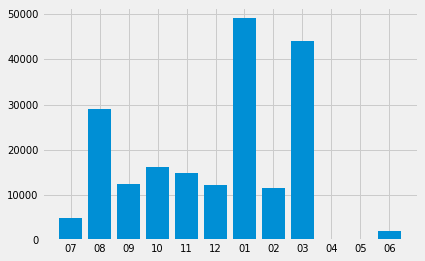

In [125]:
# Bar Graph for monthly money taken
udep = monthtot(deposit)
plt.bar(umonth,udep)
plt.show()
#changes to make- instead of only date, change it to month wise category(preprocessing)

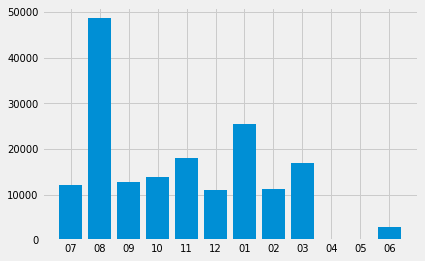

['07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06'] [12038.75, 48671.87, 12754.279999999999, 13828.529999999999, 18019.59, 11001.350000000002, 25476.75, 11324.07, 16845.8, 25.0, 180.0, 2880.82]


In [137]:
# Bar Graph for monthly spending
uwith = monthtot(withdrawal)
plt.bar(umonth,uwith)
plt.show()
print(umonth, uwith)

[355, 95, 83, 36, 25]


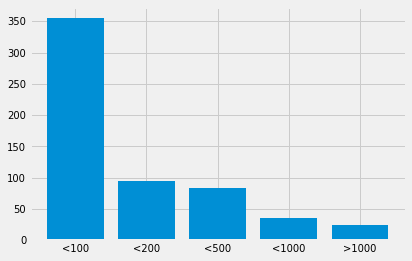

In [147]:
x = ['<100','<200','<500','<1000','>1000']
plt.bar(x,l)

print(l)

#changes to make - ₹100 intervals